In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class f_y(object):
  def __init__(self):
    pass
  
  def evaluate_function(self, x1, x2):
    y = 100 * np.sqrt(np.abs(x2 - 0.01 * x1**2)) + 0.01 * np.abs(x1 + 10)
    return y
  
  def evaluate_derivative(self, x1, x2):
    
    if ((x1 >= -10) and (x2 >= 0.01 * x1 **2 )):
      dx2 = 50 * (x2 - 0.01 * x1 **2) ** (-0.5)
      dx1 = dx2 * (-0.02 * x1) + 0.01
      
    elif ((x1 >= -10) and not(x2 >= 0.01 * x1 **2 )):
      dx2 = - 50 * ( 0.01 * x1 **2 - x2) ** (-0.5)
      dx1 = dx2 * (-0.02 * x1) + 0.01
      
    elif (not(x1 >= -10) and (x2 >= 0.01 * x1 **2 )):
      dx2 = 50 * ( 0.01 * x1 **2 - x2) ** (-0.5)
      dx1 = dx2 * (-0.02 * x1) - 0.01
      
    else:
      dx2 = -50 * ( 0.01 * x1 **2 - x2) ** (-0.5)
      dx1 = dx2 * (-0.02 * x1) - 0.01     
    
    return dx1, dx2
  
  
  

class grad_desc_alg(object):
  def __init__(self, function, learn_rate = 0.0001, max_epoch = 1000, thres = 1e-5):
    self.learn_rate = learn_rate
    self.max_epoch = max_epoch
    self.thres = thres
    self.function = function
  
  def grad_desc(self, x1, x2):
    
    dx1, dx2 = self.function.evaluate_derivative(x1, x2)
    
    new_x1 = x1 - self.learn_rate * dx1
    new_x2 = x2 - self.learn_rate * dx2
    
    return new_x1, new_x2, dx1, dx2
  
  def optimise(self, start_x1 = -9, start_x2 = 1):
    all_x1 = [start_x1]
    all_x2 = [start_x2]
    all_y = [self.function.evaluate_function(start_x1, start_x2)]
    
    
    for epoch in range(self.max_epoch):
      x1,x2,dx1,dx2 = self.grad_desc(all_x1[epoch], all_x2[epoch])
      
      all_x1.append(x1)
      all_x2.append(x2)
      y = self.function.evaluate_function(x1, x2)
      all_y.append(y)
      
      print("epoch", epoch, "x1", x1,"x2", x2,"y", y)
      
      if (np.abs(dx1) + np.abs(dx2)  < 2*self.thres):
        break
    
    return all_x1, all_x2, all_y

function1 = f_y()
gd = grad_desc_alg(function = function1)

all_x1, all_x2, all_y = gd.optimise()


epoch 0 x1 -9.002065741604834 x2 0.9885292133064719 y 42.21866768334123
epoch 1 x1 -9.004199493437568 x2 0.9766833109660954 y 40.74412373727152
epoch 2 x1 -9.00641097187295 x2 0.9644086027202682 y 39.15763272898859
epoch 3 x1 -9.0087125953321 x2 0.9516364592641652 y 37.435496772125425
epoch 4 x1 -9.011120695410982 x2 0.938276614261836 y 35.54489299864505
epoch 5 x1 -9.013657538841104 x2 0.9242059813414881 y 33.438258400502605
epoch 6 x1 -9.016354946354937 x2 0.9092486374318985 y 31.042411632964864
epoch 7 x1 -9.019261394869394 x2 0.8931365359688168 y 28.234933582226716
epoch 8 x1 -9.02245786734742 x2 0.8754218233214823 y 24.78362527170079
epoch 9 x1 -9.026100795397294 x2 0.8552392516574159 y 20.142869888828884
epoch 10 x1 -9.030585003121752 x2 0.8304045648636248 y 12.21211599055018
epoch 11 x1 -9.037986652862518 x2 0.789429092409693 y 16.569491800702778
epoch 12 x1 -9.032529889158498 x2 0.8196225631108819 y 6.138786484609846
epoch 13 x1 -9.047267983550336 x2 0.7380446742321183 y 28.379

In [2]:
min_y = min(all_y)
print("min_y:", min(all_y))

index_min_y = all_y.index(min_y)

print("min(x1, x2) is",(all_x1[index_min_y], all_x2[index_min_y]))

min_y: 0.9198828100237131
min(x1, x2) is (-9.031205711743926, 0.8155439206087441)


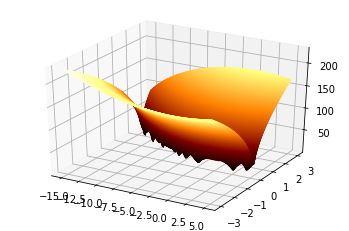

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
Axes3D = Axes3D  # pycharm auto import

all_x1 = np.linspace(-15,5,50)
all_x2 = np.linspace(-3,3,50)

X1, X2= np.meshgrid(all_x1, all_x2)
Z = function1.evaluate_function(X1,X2)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X1,X2,Z,500,cmap='afmhot')
plt.show()